# Explore Unservised Machine Learning

# Import library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Initialize data

In [2]:
data=pd.read_csv('Iris.csv')

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# Data Preparation

In [5]:
data.drop(['Id'],axis=1,inplace=True)

In [6]:
x=data.iloc[:,[0,1,2,3]].values
y=data['Species']

# Getting the best k with the help of elbow method

In [7]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
SSE = []   #cluster sum of squares
index=range(1,12)
for i in index:
    kmeans = KMeans(n_clusters = i,init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    SSE.append(kmeans.inertia_)

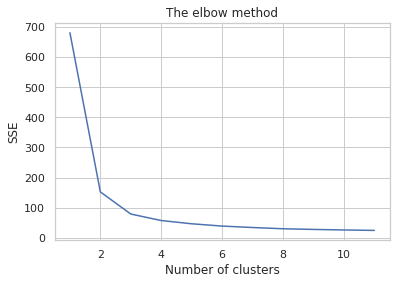

In [11]:
plt.plot(index, SSE)
sns.set(style="whitegrid")
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE') 
plt.show()

# Applying kmeans to the dataset 

In [9]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

# Visualising the clusters

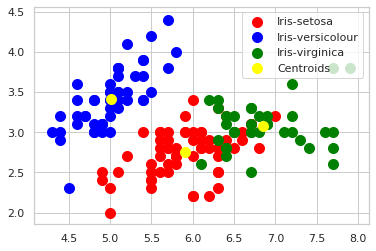

In [10]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()
plt.show()